### NY Times article comments analysis exercise:
* Use the NY Times article comments data
* Derive sentiment scores for the "commentBody" using AFINN Lexicon
* Draw separate word clouds for observations with positive, negative, and neutral(0) sentiment scores
* Do the following predictions using the approaches you have learned in class:
    * Predict the "recommedations" for each comment by using the sentiment score you derived, the word count in the "commentBody", the number of "replyCount", and whether the comment was selected by an editor ("editorsselection").
    * Predict whether a comment will be picked for "editorsSelection" by using the sentiment score you derived, the word count in the "commentBody", and the number of "recommendations", and the number of "replyCount".

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
nytimes = pd.read_csv('nytimes.csv')

In [3]:
nytimes.head()

,articleID,commentBody,commentID,commentType,createDate,editorsSelection,recommendations,replyCount,sectionName,userDisplayName,userID,userLocation
0,58ef8bfc7c459f24986da097,"Tragedies abound in war, precision munitions n...",22148699,comment,1492123756,False,1,0,Middle East,Bill Owens,66371869,Essex
1,58e5a1507c459f24986d8a56,"""...but then again, please get off my lawn"" ma...",22053980,comment,1491481436,False,6,0,Unknown,Mike P,56758055,Long Island
2,58ff102d7c459f24986dbe81,Just another flim-flam plan to shuffle mor...,22263548,comment,1493128804,False,13,1,Politics,giniajim,1651431,VA
3,58ec83fb7c459f24986d98cd,"What do you mean, nice try? Moynihan Station ...",22113999,userReply,1491924651,False,1,0,Unknown,Guy Walker,55823171,New York City
4,58fcbc357c459f24986db9d0,"Where I live, in a city where cabs are plentif...",22247141,comment,1492971817,True,124,6,Unknown,plphillips,18764882,Washington DC


In [56]:
import re #regular expressions: https://docs.python.org/2/library/re.html
def clean(x):
    return re.sub(r'\W', ' ', str(x)) # substitute all the special characters with a space.

##### Install the AFINN package:

In [57]:
from afinn import Afinn

In [58]:
afinn = Afinn(language='en')

In [59]:
afinn_wl_url = ('https://raw.githubusercontent.com'
                '/fnielsen/afinn/master/afinn/data/AFINN-111.txt')
afinn_wl_df = pd.read_csv(afinn_wl_url,header=None, sep='\t', names=['term', 'value'])
afinn_wl_df.sample(10, random_state = 23)

               term  value
2085       spammers     -3
2243       tolerant      2
514           crash     -2
203         averted     -1
87          agonise     -3
2078  sophisticated      2
151       appalling     -2
981        felonies     -3
1947         sadden     -2
103       alarmists     -2

#### nytimes example

In [60]:
nytimes['sentiscore']=nytimes['commentBody'].apply(afinn.score)

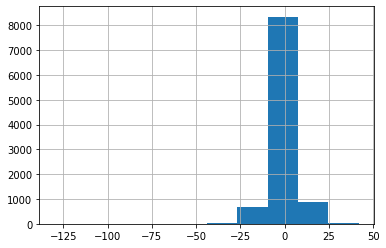

In [9]:
nytimes.sentiscore.hist()

#### Word cloud

In [61]:
from wordcloud import WordCloud,STOPWORDS
def draw_wordcloud(data, color = 'black'):
    words = ' '.join(data)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(words)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [11]:
#possitive
nytimes1=nytimes[nytimes['sentiscore']>0]
nytimes1

,articleID,commentBody,commentID,commentType,createDate,editorsSelection,recommendations,replyCount,sectionName,userDisplayName,userID,userLocation,sentiscore
1,58e5a1507c459f24986d8a56,"""...but then again, please get off my lawn"" ma...",22053980,comment,1491481436,False,6,0,Unknown,Mike P,56758055,Long Island,1.0
3,58ec83fb7c459f24986d98cd,"What do you mean, nice try? Moynihan Station ...",22113999,userReply,1491924651,False,1,0,Unknown,Guy Walker,55823171,New York City,4.0
4,58fcbc357c459f24986db9d0,"Where I live, in a city where cabs are plentif...",22247141,comment,1492971817,True,124,6,Unknown,plphillips,18764882,Washington DC,8.0
5,58ed29d27c459f24986d9aa1,I didn't watch. It's irresponsible. There are ...,22125161,comment,1491973672,False,14,0,Unknown,Janet Camp,17126318,Milwaukee,2.0
7,58f162bd7c459f24986da4d4,Raising self confident children is only part o...,22161619,comment,1492261280,True,46,1,Unknown,Vickie Hodge,41838199,Wisconsin,12.0
11,59004a7d7c459f24986dc1e5,Trump has already bragged about this piece to ...,22275374,comment,1493222931,False,4,1,Unknown,Lingonberry,64927461,"Seattle, WA",10.0
12,58ef3e357c459f24986d9fd1,The reviewer doesn't mention the exact analogy...,23752254,comment,1502946990,False,2,0,Unknown,Stuart,71998121,"Jerusalem, Israel",6.0
13,58e611b17c459f24986d8b46,"We don't snoop, but we have always had an expl...",22077487,comment,1491591128,False,22,0,Family,John Person,40442027,New York,1.0
15,58f861787c459f24986db146,He won last November because the Kremlin helpe...,22220926,userReply,1492720796,False,2,0,Unknown,Beth!,6824236,Colorado,7.0
16,5903e2b87c459f24986dccf4,So Betsy DeVos wants students to achieve less ...,22308925,userReply,1493466420,False,18,0,Politics,Gail,50503812,Chelmsford,4.0


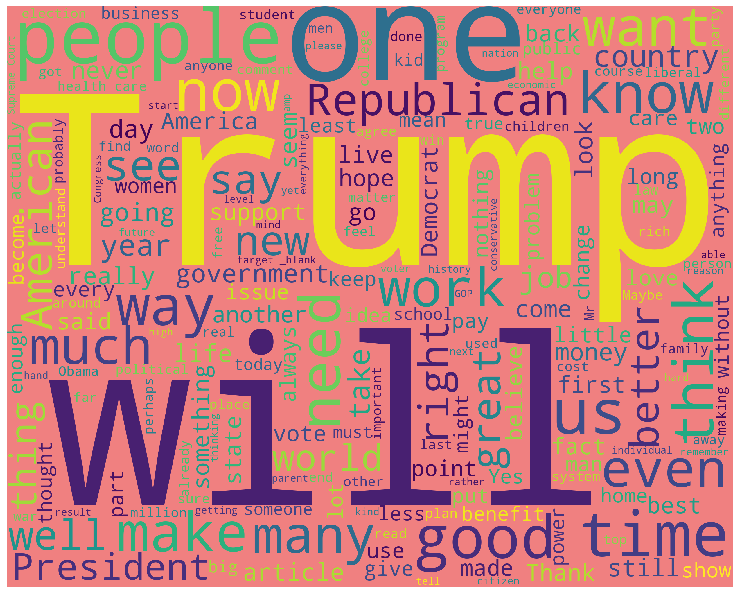

In [12]:
draw_wordcloud(nytimes1.commentBody, 'lightcoral')
#names colors: https://matplotlib.org/3.1.1/gallery/color/named_colors.html

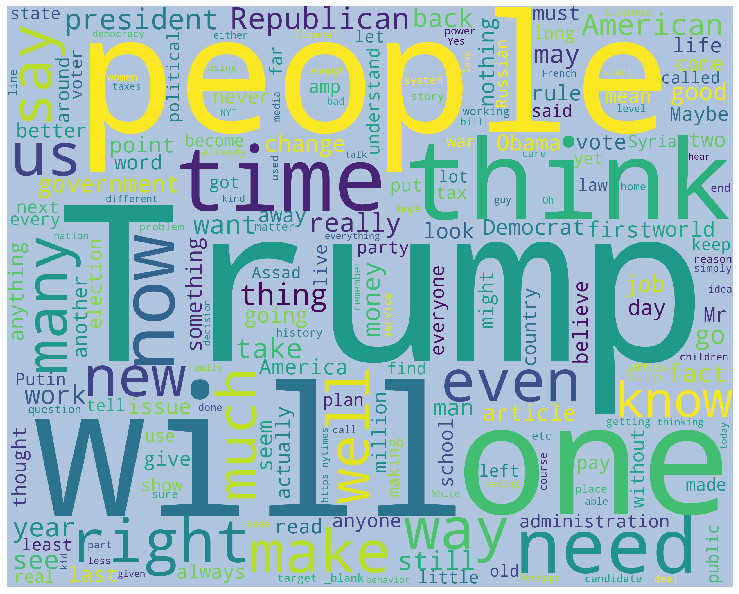

In [13]:
#neutural
nytimes2=nytimes[nytimes['sentiscore']==0]
draw_wordcloud(nytimes2.commentBody, 'lightsteelblue')
#names colors: https://matplotlib.org/3.1.1/gallery/color/named_colors.html

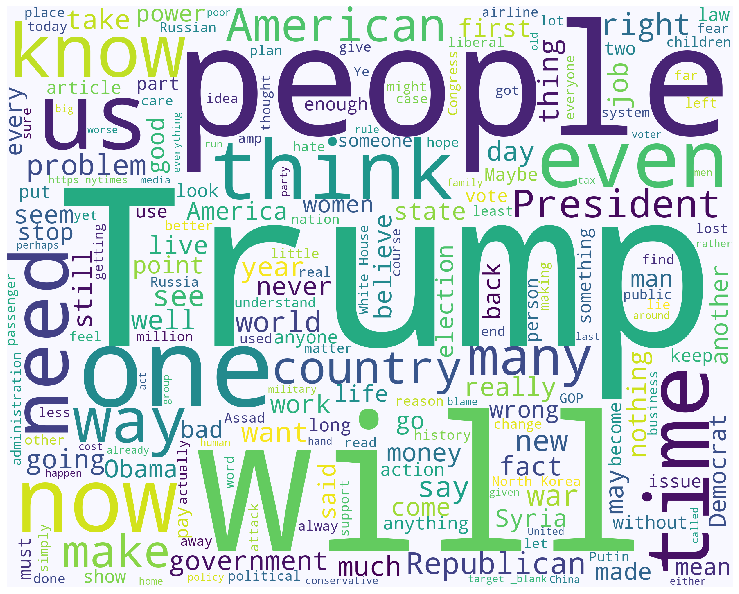

In [14]:
#neutural
nytimes3=nytimes[nytimes['sentiscore']<0]
draw_wordcloud(nytimes3.commentBody, 'ghostwhite')

#### Function to split text and count number of words

In [62]:
def split_count(txtstr):
    return len(txtstr.split())

In [63]:
nytimes['comment_wordcount']=nytimes['commentBody'].apply(split_count)
nytimes.head()

                  articleID  \
0  58ef8bfc7c459f24986da097   
1  58e5a1507c459f24986d8a56   
2  58ff102d7c459f24986dbe81   
3  58ec83fb7c459f24986d98cd   
4  58fcbc357c459f24986db9d0   

                                         commentBody  commentID commentType  \
0  Tragedies abound in war, precision munitions n...   22148699     comment   
1  "...but then again, please get off my lawn" ma...   22053980     comment   
2      Just another flim-flam plan to shuffle mor...   22263548     comment   
3  What do you mean, nice try?  Moynihan Station ...   22113999   userReply   
4  Where I live, in a city where cabs are plentif...   22247141     comment   

   createDate  editorsSelection  recommendations  replyCount  sectionName  \
0  1492123756             False                1           0  Middle East   
1  1491481436             False                6           0      Unknown   
2  1493128804             False               13           1     Politics   
3  1491924651             Fals

### prediction1


##### 1.clean and preprocess data 

In [64]:
nytimes1=nytimes[['editorsSelection','replyCount','sentiscore','comment_wordcount','recommendations']]
nytimes1.head()

   editorsSelection  replyCount  sentiscore  comment_wordcount  \
0             False           0        -4.0                  7   
1             False           0         1.0                 14   
2             False           1         0.0                 12   
3             False           0         4.0                104   
4              True           6         8.0                120   

   recommendations  
0                1  
1                6  
2               13  
3                1  
4              124  

In [65]:
nytimes1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
editorsSelection     10000 non-null bool
replyCount           10000 non-null int64
sentiscore           10000 non-null float64
comment_wordcount    10000 non-null int64
recommendations      10000 non-null int64
dtypes: bool(1), float64(1), int64(3)
memory usage: 322.3 KB


In [26]:
nytimes1.describe()

,replyCount,sentiscore,comment_wordcount,recommendations
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,0.40110,-0.283000,73.459700,18.812400
std,1.97023,7.166188,63.508284,115.840426
min,-115.00000,-130.000000,2.000000,0.000000
25%,0.00000,-3.000000,26.000000,1.000000
50%,0.00000,0.000000,53.000000,3.000000
75%,0.00000,3.000000,100.000000,9.000000
max,50.00000,42.000000,296.000000,5671.000000


In [27]:
nytimes1.corr()

,editorsSelection,replyCount,sentiscore,comment_wordcount,recommendations
editorsSelection,1.000000,0.232000,-0.020361,0.104155,0.364161
replyCount,0.232000,1.000000,-0.009434,0.096582,0.391109
sentiscore,-0.020361,-0.009434,1.000000,-0.060556,-0.018819
comment_wordcount,0.104155,0.096582,-0.060556,1.000000,0.055818
recommendations,0.364161,0.391109,-0.018819,0.055818,1.000000


#### 2. exploratory data analysis

In [66]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

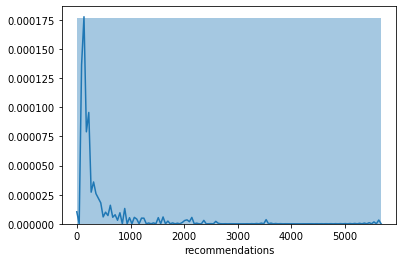

In [33]:
sns.distplot(nytimes1['recommendations'], bins=1)

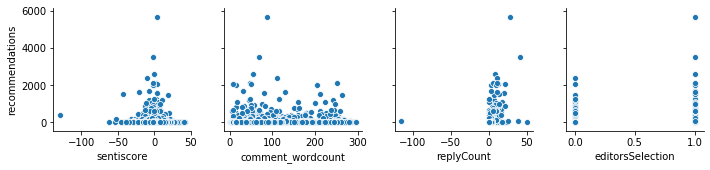

In [34]:
sns.pairplot(data=nytimes1,
                  y_vars=['recommendations'],
                  x_vars=['sentiscore', 'comment_wordcount', 'replyCount','editorsSelection'])

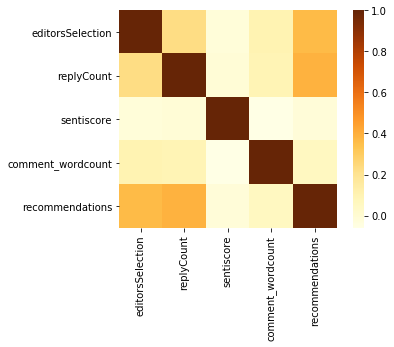

In [35]:
corrmat = nytimes1.corr()
sns.heatmap(corrmat, square = True, cmap="YlOrBr")

In [67]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn.linear_model as sklm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, \
                            accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

#### KNN regression & Cross Validation

In [68]:
Xp=preprocessing.scale(nytimes1[['sentiscore', 'comment_wordcount', 'replyCount','editorsSelection']]).astype('float64')#scaling
yp=preprocessing.scale(nytimes1.recommendations).astype('float64')#scaling
knn_rcv = KNeighborsRegressor(n_neighbors=5, weights='uniform')

In [69]:
#splitting into training and test(or validation) sets
X_train, X_test, Y_train, Y_test = train_test_split(Xp, yp, test_size=0.25, random_state=7)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(7500, 4) (7500,)
(2500, 4) (2500,)


In [35]:
knn_rcv.fit(X_train, Y_train)
scores_mse =  cross_validate(knn_rcv, X_train, Y_train, cv=5, scoring='neg_mean_squared_error') #5-fold
scores_mse['test_score'].mean()

-1.003940621957275

In [40]:
np.sqrt(scores_mse['test_score'].mean()*-1)

1.001968373731065

In [41]:
np.sqrt(np.square((knn_rcv.predict(X_test)-Y_test)).mean()) #average error of prediction in test (or validation) data.

0.6889283136199437

### Linear Regression & Cross Validation

In [42]:
recoreg=sklm.LinearRegression()
recoreg.fit(X_train, Y_train)
reco_mse_lm   = cross_validate(recoreg, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
reco_mse_lm['test_score'].mean()

-0.8402575993610565

In [43]:
print('Intercept:', recoreg.intercept_)
print('sentiscore:', recoreg.coef_[0])
print('comment_wordcount:', recoreg.coef_[1])
print('replyCount:', recoreg.coef_[2])
print('editorsSelection:', recoreg.coef_[3])
recommendation_predict2=recoreg.fit(X_train, Y_train).predict(X_train)
MSE=mean_squared_error(Y_train,recommendation_predict2)
R2=r2_score(Y_train, recommendation_predict2)
print("Mean Squared Error:", MSE)
print("R-Squared:", R2)

Intercept: 0.0005226828263940443
sentiscore: -0.004621203388713525
comment_wordcount: -0.024484572453675888
replyCount: 0.5032838573329608
editorsSelection: 0.2656470080331095
Mean Squared Error: 0.8101569687773693
R-Squared: 0.29715408425594514


In [44]:
np.sqrt(reco_mse_lm['test_score'].mean()*-1) #training error using linear regression

0.9166556601914683

In [45]:
np.sqrt(np.square((recoreg.predict(X_test)-Y_test)).mean()) #average error of prediction in test (or validation) data.

0.8732734631419757

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus as pplus
import graphviz
from IPython.display import Image
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import *
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, \
    RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
pd.set_option('display.notebook_repr_html', False)
%matplotlib inline
plt.style.use('seaborn-white')

In [71]:
#This function helps with drawing decision trees using the pydotplus and graphviz libraries
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)

#### Regression trees

In [49]:
nytimes=nytimes.dropna()
nytimes1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
editorsSelection     10000 non-null bool
replyCount           10000 non-null int64
sentiscore           10000 non-null float64
comment_wordcount    10000 non-null int64
recommendations      10000 non-null int64
dtypes: bool(1), float64(1), int64(3)
memory usage: 322.3 KB


In [50]:
nytimes_X = nytimes1.drop('recommendations',axis=1)
X2 = nytimes_X.values
y2 = np.log(nytimes1.recommendations.values)


/Users/qsl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
#documentation: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
regtree2 = DecisionTreeRegressor(max_depth=3, random_state=23)
regtree2.fit(X_train, Y_train)
pred = regtree2.predict(X_test)

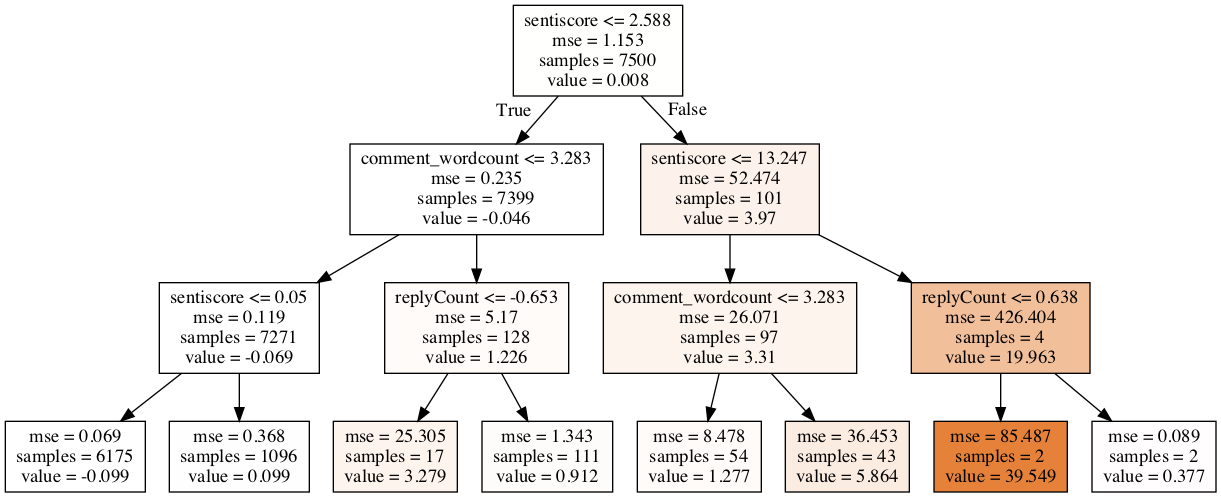

In [52]:
graph2 = print_tree(regtree2, features=nytimes_X.columns)
Image(graph2.create_png())

#### random forest +bagging

In [56]:
regtree3 = RandomForestRegressor(max_features=4, random_state=23)
regtree3.fit(X_train, Y_train)

/Users/qsl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=23, verbose=0,
                      warm_start=False)

In [54]:
pred3 = regtree3.predict(X_test)
mean_squared_error(Y_test, pred3)

0.5134984469360798

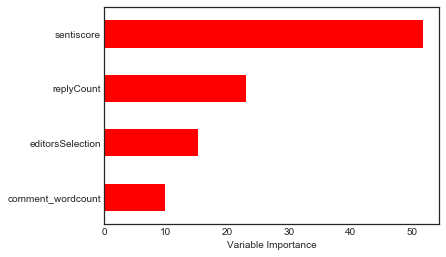

In [57]:
Importance = pd.DataFrame({'Importance':regtree3.feature_importances_*100}, index=nytimes_X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

#### boosting

In [58]:
regtree5 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=23)
regtree5.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=23, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### classification 

###### Classification Trees

In [73]:
nytimes1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
editorsSelection     10000 non-null bool
replyCount           10000 non-null int64
sentiscore           10000 non-null float64
comment_wordcount    10000 non-null int64
recommendations      10000 non-null int64
dtypes: bool(1), float64(1), int64(3)
memory usage: 322.3 KB


In [74]:
X = nytimes1.drop('editorsSelection', axis=1)
y = nytimes.editorsSelection

In [75]:
#split to training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=23)

In [76]:
# documentation: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
clftree_train = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=6, max_features=4, random_state=23)
clftree_train.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=4, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=23, splitter='best')

In [77]:
clftree_train.score(X_train,y_train)

0.9816

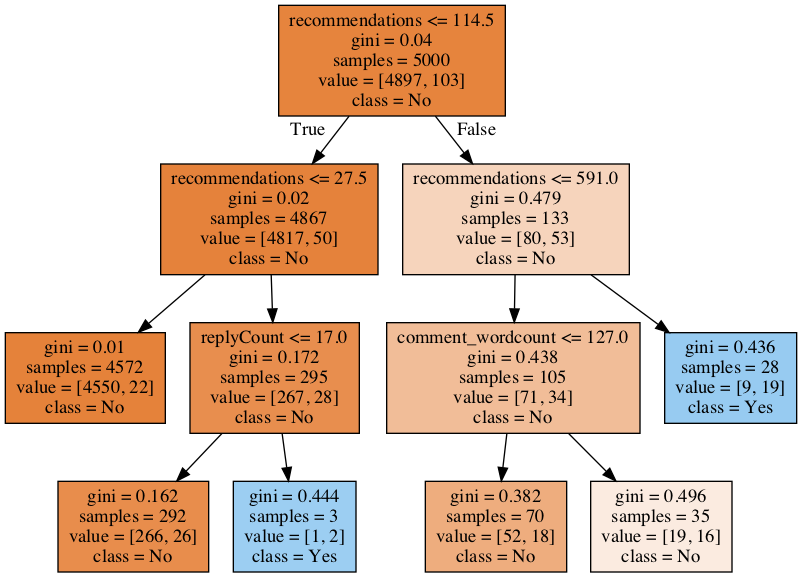

In [78]:
graph = print_tree(clftree_train, features=X.columns, class_names=['No', 'Yes'])
Image(graph.create_png())

In [79]:
cm = pd.DataFrame(confusion_matrix(y_train, clftree_train.predict(X_train)).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True         No  Yes
Predicted           
No         4887   82
Yes          10   21

In [80]:
print(classification_report(y_train, clftree_train.predict(X_train)))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      4897
        True       0.68      0.20      0.31       103

    accuracy                           0.98      5000
   macro avg       0.83      0.60      0.65      5000
weighted avg       0.98      0.98      0.98      5000



In [81]:
pred = clftree_train.predict(X_test)

In [82]:
cm1 = pd.DataFrame(confusion_matrix(y_test, clftree_train.predict(X_test)).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm1.index.name = 'Predicted'
cm1.columns.name = 'True'
cm1

True         No  Yes
Predicted           
No         4878   98
Yes           8   16

In [83]:
print(classification_report(y_test, clftree_train.predict(X_test)))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      4886
        True       0.67      0.14      0.23       114

    accuracy                           0.98      5000
   macro avg       0.82      0.57      0.61      5000
weighted avg       0.97      0.98      0.97      5000



#### Logistic Regression & Cross Validation

In [29]:
lgr=sklm.LogisticRegression(solver='liblinear') #solver is the type of optimization algorithm
lgr.fit(Xvar_train, Yvar_train)
scores_accuracy_lgr =  cross_val_score(lgr, Xvar_train, Yvar_train, cv=4, scoring='accuracy')
scores_accuracy_lgr.mean() #training accuracy

0.9798668773073191

In [30]:
lgr.score(Xvar_test, Yvar_test) #test accuracy

0.9812

In [31]:
ypredprob = lgr.predict_proba(Xvar_test)[:, 1]
ypredclass = (preprocessing.binarize(ypredprob.reshape(-1,1), 0.4)).reshape(1,-1)[0]
cm = confusion_matrix(Yvar_test, ypredclass)
print("Confusion Matrix:\n", cm)
print("\n")
print("Classification Report:\n",classification_report(Yvar_test, ypredclass))

Confusion Matrix:
 [[2447   11    0]
 [   0    0    0]
 [  39    3    0]]


Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2458
         1.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00        42

    accuracy                           0.98      2500
   macro avg       0.33      0.33      0.33      2500
weighted avg       0.97      0.98      0.97      2500



/Users/qsl/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/qsl/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


#### random forest +bagging

In [84]:
clftree_train2 = RandomForestClassifier(max_features=4, random_state=23)
clftree_train2.fit(X_train,y_train)

/Users/qsl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=23, verbose=0,
                       warm_start=False)

In [85]:
predcl = clftree_train2.predict(X_test)

In [86]:
cmcl1 = pd.DataFrame(confusion_matrix(y_test, clftree_train2.predict(X_test)).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cmcl1.index.name = 'Predicted'
cmcl1.columns.name = 'True'
cmcl1

True         No  Yes
Predicted           
No         4871  102
Yes          15   12

In [87]:
print(classification_report(y_test, clftree_train2.predict(X_test)))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      4886
        True       0.44      0.11      0.17       114

    accuracy                           0.98      5000
   macro avg       0.71      0.55      0.58      5000
weighted avg       0.97      0.98      0.97      5000



#### boosting

In [88]:
clftree_train3 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, random_state=23)
clftree_train3.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=23, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [89]:
predcl3 = clftree_train3.predict(X_test)

In [90]:
cmcl3 = pd.DataFrame(confusion_matrix(y_test, clftree_train3.predict(X_test)).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cmcl3.index.name = 'Predicted'
cmcl3.columns.name = 'True'
cmcl3

True         No  Yes
Predicted           
No         4870   92
Yes          16   22

In [91]:
print(classification_report(y_test, clftree_train3.predict(X_test)))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      4886
        True       0.58      0.19      0.29       114

    accuracy                           0.98      5000
   macro avg       0.78      0.59      0.64      5000
weighted avg       0.97      0.98      0.97      5000



sentiscore            5.555081
comment_wordcount    10.106829
replyCount           11.605985
recommendations      72.732106
dtype: float64


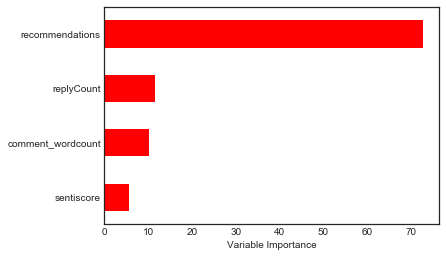

In [92]:
feature_importance3 = clftree_train3.feature_importances_*100
rel_imp3 = pd.Series(feature_importance3, index=X.columns).sort_values(inplace=False)
print(rel_imp3)
rel_imp3.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None